In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 100

In [2]:
jobs = pd.read_csv('./data/jobs_clean.csv')
print('Jobs shape:', jobs.shape)
jobs.info()
jobs.head()

Jobs shape: (233, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_position      233 non-null    object
 1   company_name      233 non-null    object
 2   job_country       233 non-null    object
 3   job_posting_date  233 non-null    object
 4   Employment_type   233 non-null    object
 5   Seniority_level   231 non-null    object
 6   job_description   233 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


,job_position,company_name,job_country,job_posting_date,Employment_type,Seniority_level,job_description
0,Data Scientist,MatchaTalent,Saudi Arabia,2023-06-18,Full-time,Entry level,"This role required candidate to permanently relocate at Dhahran, Saudi Arabia. About the CompanyThis company engages in the exploration, production, transportation, and sale of crude oil and natur..."
1,Data Science Specialist,Halian,Saudi Arabia,2023-05-16,Full-time,Entry level,Our ClientWe are partnered with one of the biggest players in the Financial Services sector in Saudi Arabia.On their behalf we are looking to hire a Data Scientist Specialist.Your Responsibilities...
2,Data Scientist,Garima Interprises,Saudi Arabia,2023-06-02,Full-time,Entry level,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c..."
3,Data Scientist,Garima Interprises,Saudi Arabia,2023-05-11,Full-time,Entry level,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c..."
4,Data Scientist Engineer,Energy Jobline,Saudi Arabia,2023-06-07,Full-time,Entry level,"Aramco energizes the world economy. Aramco occupies a unique position in the global energy industry. We are the world's largest producer of hydrocarbons (oil and gas), with the lowest upstream car..."


In [19]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
freq_mat = tfidf.fit_transform(jobs['job_description'])
print('Vectorized matrix shape:', freq_mat.shape)

Vectorized matrix shape: (233, 9332)


In [25]:
# print(dir(tfidf))
len(tfidf.get_feature_names())

9332

In [28]:
freq_mat.sum(axis=0).tolist()[0]

[0.21676207876931053,
 2.323799929957774,
 0.0892822096681136,
 0.1586755278693901,
 0.06459126045700508,
 0.04163509742518486,
 0.13069466149007455,
 0.160646192256086,
 0.10009402999412079,
 0.10009402999412079,
 0.1078392638762402,
 0.060509268839843644,
 1.485099279476824,
 1.014682766122508,
 0.08838476082610892,
 0.10761220155419354,
 0.36918725578265105,
 0.07083498985544064,
 0.0423695868804781,
 0.07589451176176579,
 0.0701555043142967,
 0.06825827794463216,
 0.685468772315217,
 0.09683814820869394,
 0.05226217656948687,
 0.0775540967628389,
 0.1652038307887199,
 0.509267464283529,
 0.1352877701953094,
 0.046516606744093164,
 0.03737769707389948,
 0.0423695868804781,
 0.4683069866738091,
 0.05957807444361638,
 0.1344679937527045,
 0.06382711427061231,
 0.17342906484993179,
 0.11321489402339882,
 0.053695234155895326,
 0.07589451176176579,
 0.06155658445646064,
 0.10452435313897374,
 0.06401177444753896,
 0.7801687777738346,
 0.576574809696559,
 0.04466710344751763,
 0.09627141

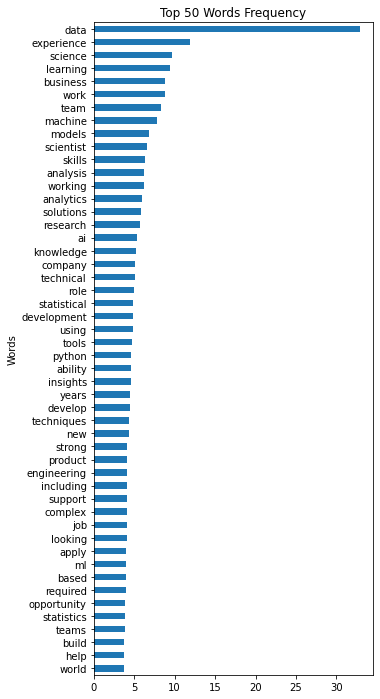

In [31]:
n = 50
tokens_freq = pd.Series(freq_mat.sum(axis=0).tolist()[0], index=tfidf.get_feature_names())
(tokens_freq.sort_values(ascending=True)
            .tail(n)
            .plot(
                kind='barh',
                title=f'Top {n} Words Frequency',
                xlabel='Words',
                ylabel='Frequency',
                figsize=[5,12]
            )
);